In [1]:
from myAE import Manager
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
manager = Manager()
manager.prepare_data()

def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

manager.set_default_model(4, 2)

In [3]:
hist = manager.train_on_cpu(calc_loss, epochs=30)

Now, it is working on cpu.


100%|██████████| 30/30 [05:29<00:00, 10.97s/it]


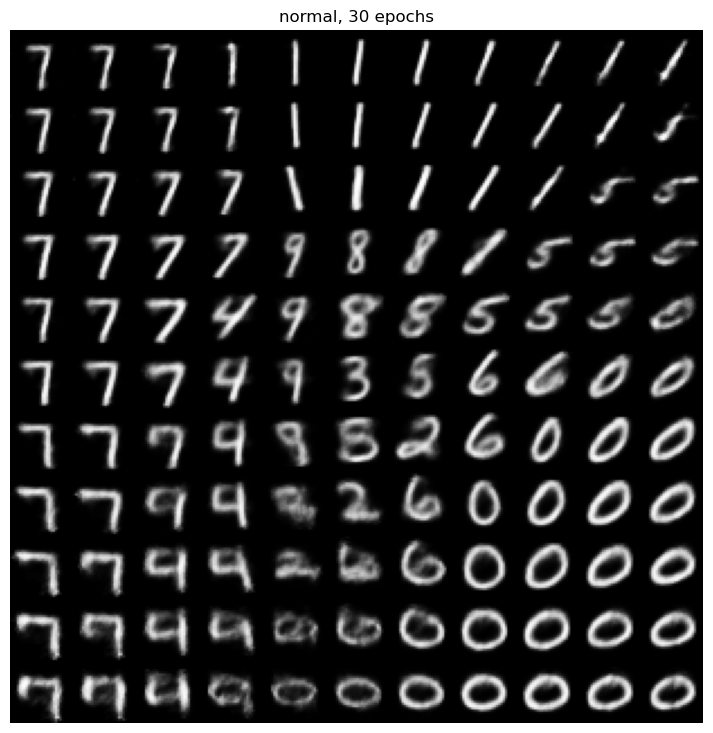

In [4]:
manager.plot_generated_images('normal, 30 epochs')

In [5]:
manager_2 = Manager()
manager_2.prepare_data()

def calc_loss_2(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = (ll + 1).log() + kl
    return loss

manager_2.set_default_model(4, 2)

In [6]:
hist_2 = manager_2.train_on_cpu(calc_loss_2, epochs=30)

Now, it is working on cpu.


100%|██████████| 30/30 [05:30<00:00, 11.02s/it]


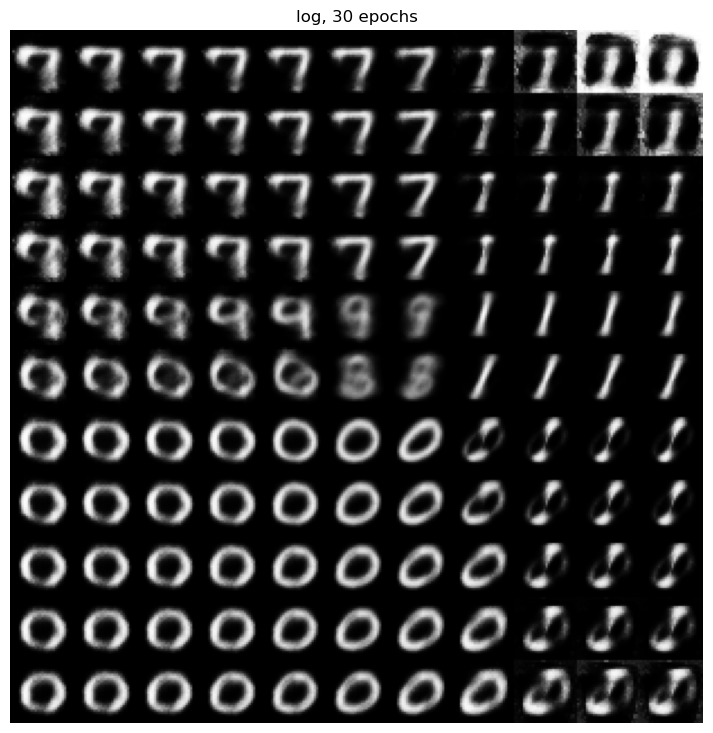

In [7]:
manager_2.plot_generated_images('log, 30 epochs')

In [8]:
manager_3 = Manager()
manager_3.prepare_data()

def calc_loss_3(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = 1.1**(ll) + kl
    return loss

manager_3.set_default_model(4, 2)

In [9]:
hist_3 = manager_3.train_on_cpu(calc_loss_3, epochs=30)

Now, it is working on cpu.


100%|██████████| 30/30 [05:34<00:00, 11.16s/it]


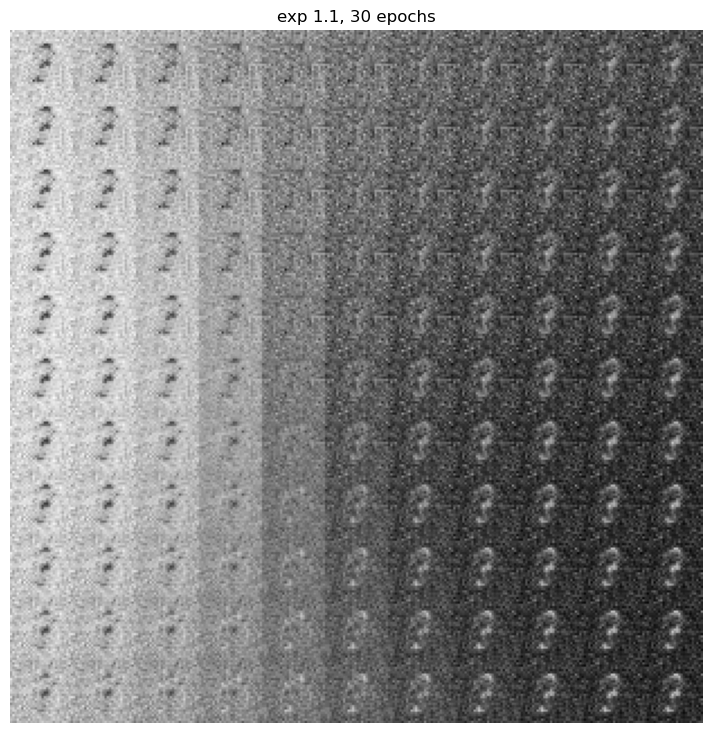

In [10]:
manager_3.plot_generated_images('exp 1.1, 30 epochs')